## 9. Classification Exercise

## Assignment

There are 2 files [training and test](https://github.com/WHPAN0108/BHT-DataScience-S23/tree/main/classification/data/Assigment)  

This dataset is designed to understand the factors that lead a person to leave their current job for HR research. By model(s) that uses the current credentials, demographics, and experience data you will **predict the probability of a candidate looking for a new job or will work for the company, as well as interpreting affected factors on employee decision.**

**Note:**

*   The dataset is imbalanced.
*   Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
*   Missing imputation can be a part of your pipeline as well.

### Features

*   city\_ development \_index : Developement index of the city (scaled)
*   gender: Gender of candidate
*   relevent\_experience: Relevant experience of candidate
*   enrolled\_university: Type of University course enrolled if any
*   education\_level: Education level of candidate
*   major\_discipline :Education major discipline of candidate
*   experience: Candidate total experience in years,  
*   company\_type : Type of current employer
*   last\_new\_job: Difference in years between previous job and current job
*   training\_hours: training hours completed
*   target: 0 - Not looking for job change, 1 - Looking for a job change

### Task1 Data clean, imputation

1. in **experience,** replace >20 to 21; <1 to 1, and convert this as a numerical column

2. in **last\_new\_job**, replace >4 to 5; never to 0, and convert this as a numerical column  

3. If the column is categorical, impute the missing value as its mode. If the column is numerical, impute the missing value as its median

### Task2 Classification

1. Build a classification model from the training set ( you can use any algorithms)

2. generate the confusion matrix and calculate the accuracy, precision, recall, and F1-score on training set.  

3. Applying the model in the test set and generating the prediction

4. generate the confusion matrix from the test set and calculate the accuracy, precision, recall, and F1-score  

5. compare the results between the training and test set  

**The data is modifed , but you can get some help from [Kaggle](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?select=sample_submission.csv)**

Extra point: think about what kind of the method can increase the performance (does not need to run)

## Load Data

In [1]:
import pandas as pd

# Load the datasets
train_url = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_train.csv"
test_url = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_test.csv"
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

display(train_df)
display(test_df)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5,NaN,never,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,>4,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Public Sector,>4,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1,NaN,never,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,>4,46,0
...,...,...,...,...,...,...,...,...,...,...,...
2095,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,NaN,4,4,0
2096,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,Funded Startup,2,10,1
2097,0.855,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,never,37,0
2098,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,11,0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,NaN,Has relevent experience,Full time course,Graduate,Other,3,Pvt Ltd,1,134,0
1,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,5,Early Stage Startup,1,34,1
2,0.767,NaN,Has relevent experience,Full time course,Graduate,STEM,10,Pvt Ltd,2,90,0
3,0.910,Male,No relevent experience,NaN,High School,NaN,10,NaN,never,42,0
4,0.624,Male,Has relevent experience,Part time course,Graduate,STEM,3,Pvt Ltd,1,198,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Pvt Ltd,never,139,0
96,0.926,Male,No relevent experience,no_enrollment,Masters,STEM,10,NaN,2,45,1
97,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,7,NaN,1,22,0
98,0.939,Male,No relevent experience,Full time course,High School,NaN,7,NaN,1,182,0


In [2]:
train_df.describe()

,city_development_index,training_hours,target
count,2100.000000,2100.000000,2100.000000
mean,0.826898,65.896190,0.254762
std,0.124464,58.432483,0.435831
min,0.448000,1.000000,0.000000
25%,0.729250,24.000000,0.000000
50%,0.899000,49.000000,0.000000
75%,0.920000,89.250000,1.000000
max,0.949000,336.000000,1.000000


## Data Clean and Imputation

In [3]:
def clean_and_impute(df):

    # Impute missing values
    for column in df.columns:
      if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0]).astype('category')
      else:
        df[column].fillna(df[column].median(), inplace=True)

    # Experience column
    df['experience'] = df['experience'].replace({'<1': '1', '>20': '21'}).astype(int)
    # Last new job column
    df['last_new_job'] = df['last_new_job'].replace({'never': '0', '>4': '5'}).astype(int)

    return df

# Clean and impute the training and test datasets
train_df = clean_and_impute(train_df)
test_df = clean_and_impute(test_df)
# Verify the changes
display(train_df.head())
display(test_df.head())

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,STEM,5,Pvt Ltd,0,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Pvt Ltd,5,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Public Sector,5,26,0
3,0.624,Male,No relevent experience,Full time course,High School,STEM,1,Pvt Ltd,0,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,21,Pvt Ltd,5,46,0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,Has relevent experience,Full time course,Graduate,Other,3,Pvt Ltd,1,134,0
1,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,5,Early Stage Startup,1,34,1
2,0.767,Male,Has relevent experience,Full time course,Graduate,STEM,10,Pvt Ltd,2,90,0
3,0.910,Male,No relevent experience,no_enrollment,High School,STEM,10,Pvt Ltd,0,42,0
4,0.624,Male,Has relevent experience,Part time course,Graduate,STEM,3,Pvt Ltd,1,198,0


## Feature Encoding

Some columns have a high cardinality, but one-hot is still reasonable.  
However we could also use embeddings and label, binary or target encoding.

In [4]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

def encode_features(train_df, test_df):
  """
  Encodes categorical features in the training and test datasets.

  Args:
    train_df: Pandas DataFrame containing the training data.
    test_df: Pandas DataFrame containing the test data.

  Returns:
    Tuple of encoded training and test DataFrames.
  """

  categorical_cols = train_df.select_dtypes(include=['category']).columns
  ordinal_cols = ['education_level', 'last_new_job'] # ordinals

  for col in categorical_cols:
    if col in ordinal_cols:
      # Use ordinal encoding for specified columns
      encoder = OrdinalEncoder()
      train_encoded = encoder.fit_transform(train_df[[col]])
      test_encoded = encoder.transform(test_df[[col]])
      new_cols = [f"{col}_encoded"]
    else:
      # Use one-hot encoding for other categorical features
      encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
      train_encoded = encoder.fit_transform(train_df[[col]])
      test_encoded = encoder.transform(test_df[[col]])
      new_cols = [f"{col}_{cat}" for cat in encoder.categories_[0]]

    # Add the encoded features to the DataFrames
    train_df = pd.concat([train_df, pd.DataFrame(train_encoded, columns=new_cols)], axis=1)
    test_df = pd.concat([test_df, pd.DataFrame(test_encoded, columns=new_cols)], axis=1)

    # Remove the original categorical column
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

  return train_df, test_df

# Encode the features
train_df, test_df = encode_features(train_df.copy(), test_df.copy())

# Align the test set columns with the training set columns
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Verify the changes
display(train_df.head())
display(test_df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

,city_development_index,experience,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.624,5,0,21,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.926,21,5,12,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.920,21,5,26,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.624,1,0,30,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.920,21,5,46,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


,city_development_index,experience,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.624,3,1,134,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.920,5,1,34,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.767,10,2,90,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.910,10,0,42,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.624,3,1,198,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skm

# Split the training data into features and target
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

# Train a logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)

metrics = {
  "train": {
    "confusion_matrix": skm.confusion_matrix(y_train, y_train_pred),
    "accuracy": skm.accuracy_score(y_train, y_train_pred),
    "precision": skm.precision_score(y_train, y_train_pred),
    "recall": skm.recall_score(y_train, y_train_pred),
    "f1_score": skm.f1_score(y_train, y_train_pred)
  }
}

# Print the training set evaluation metrics
for name, value in metrics["train"].items():
  print(f"Train Set {name.capitalize()}: {value}")

Train Set Confusion_matrix: [[1122  443]
 [ 176  359]]
Train Set Accuracy: 0.7052380952380952
Train Set Precision: 0.4476309226932668
Train Set Recall: 0.6710280373831776
Train Set F1_score: 0.5370231862378458


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Test Model

In [6]:
# Split the test data into features and target
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Predict on the test set
y_test_pred = model.predict(X_test)

metrics["test"] = {
    "confusion_matrix": skm.confusion_matrix(y_test, y_test_pred),
    "accuracy": skm.accuracy_score(y_test, y_test_pred),
    "precision": skm.precision_score(y_test, y_test_pred),
    "recall": skm.recall_score(y_test, y_test_pred),
    "f1_score": skm.f1_score(y_test, y_test_pred)
}

# Print the test set evaluation metrics
for name, value in metrics["train"].items():
  print(f"Test Set {name.capitalize()}: {value}")

Test Set Confusion_matrix: [[1122  443]
 [ 176  359]]
Test Set Accuracy: 0.7052380952380952
Test Set Precision: 0.4476309226932668
Test Set Recall: 0.6710280373831776
Test Set F1_score: 0.5370231862378458


## Comparison

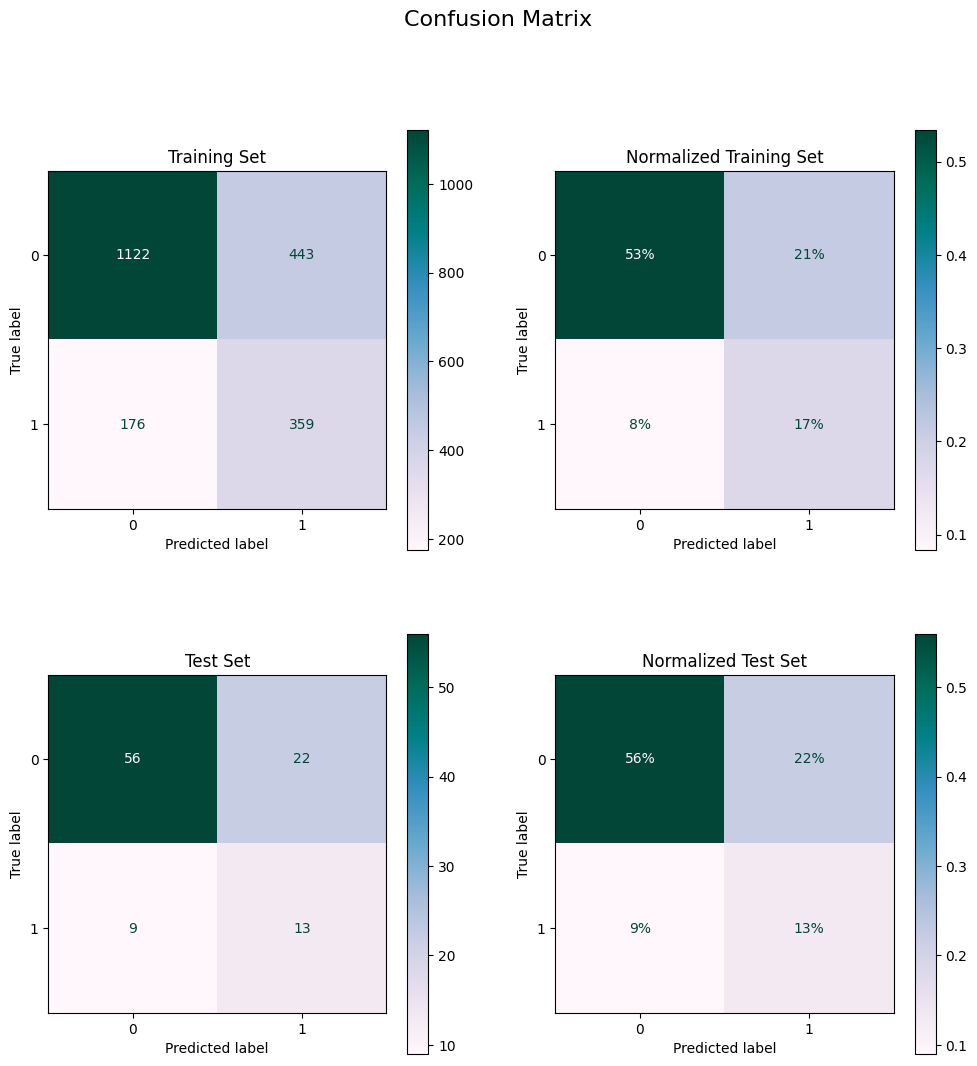

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, (X, y) in enumerate([(X_train,y_train),(X_test,y_test)]):
  for j, normalize in enumerate([None, "Normalized "]):
    ConfusionMatrixDisplay.from_estimator( model, X, y, ax=axes[i,j],
      values_format=(".0%" if normalize else None), cmap="PuBuGn",
      normalize=("all" if normalize else None),
    )
    axes[i,j].set_title(f"{normalize or ''}{['Training Set','Test Set'][i]}")

fig.suptitle("Confusion Matrix",fontsize=16)

plt.show()

We could also use "true" and "pred" to normalize the confusion matrix...

- ‘true’ - normalizes each row, showing the proportion of predictions for each actual class, useful for understanding the recall or sensitivity of your model for each class.
- ‘pred’ - normalizes each column, showing the proportion of actual instances for each predicted class, useful for understanding the precision of your model for each class.
- ‘all’ - normalizes the entire matrix, showing the proportion of the total predictions, useful for getting an overall sense of the model’s performance.


In [8]:
for y_true, y_pred, set_name in [(y_train, y_train_pred, "Training Set"), (y_test, y_test_pred, "Test Set")]:
    for norm in ["pred", "true"]:
        print(f"{set_name} Normalized Confusion Matrix (by {norm}):\n", skm.confusion_matrix(y_true, y_pred, normalize=norm))

Training Set Normalized Confusion Matrix (by pred):
 [[0.86440678 0.55236908]
 [0.13559322 0.44763092]]
Training Set Normalized Confusion Matrix (by true):
 [[0.71693291 0.28306709]
 [0.32897196 0.67102804]]
Test Set Normalized Confusion Matrix (by pred):
 [[0.86153846 0.62857143]
 [0.13846154 0.37142857]]
Test Set Normalized Confusion Matrix (by true):
 [[0.71794872 0.28205128]
 [0.40909091 0.59090909]]


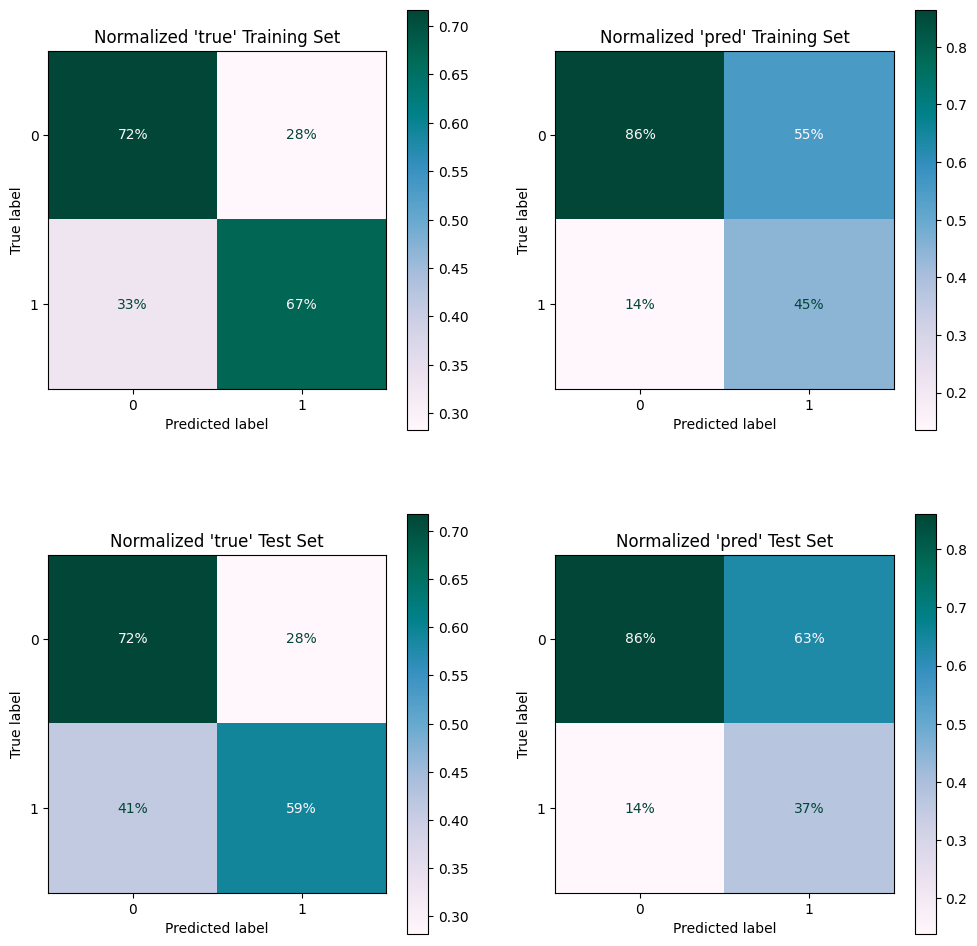

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, (X, y) in enumerate([(X_train, y_train), (X_test, y_test)]):
  for j, n in enumerate(["true", "pred"]):
    ConfusionMatrixDisplay.from_estimator(
        model, X, y, ax=axes[i,j], normalize=n,
        values_format=".0%" if normalize else None, cmap="PuBuGn",
    )
    axes[i,j].set_title(f"Normalized '{n}' {['Training Set','Test Set'][i]}")

plt.show()

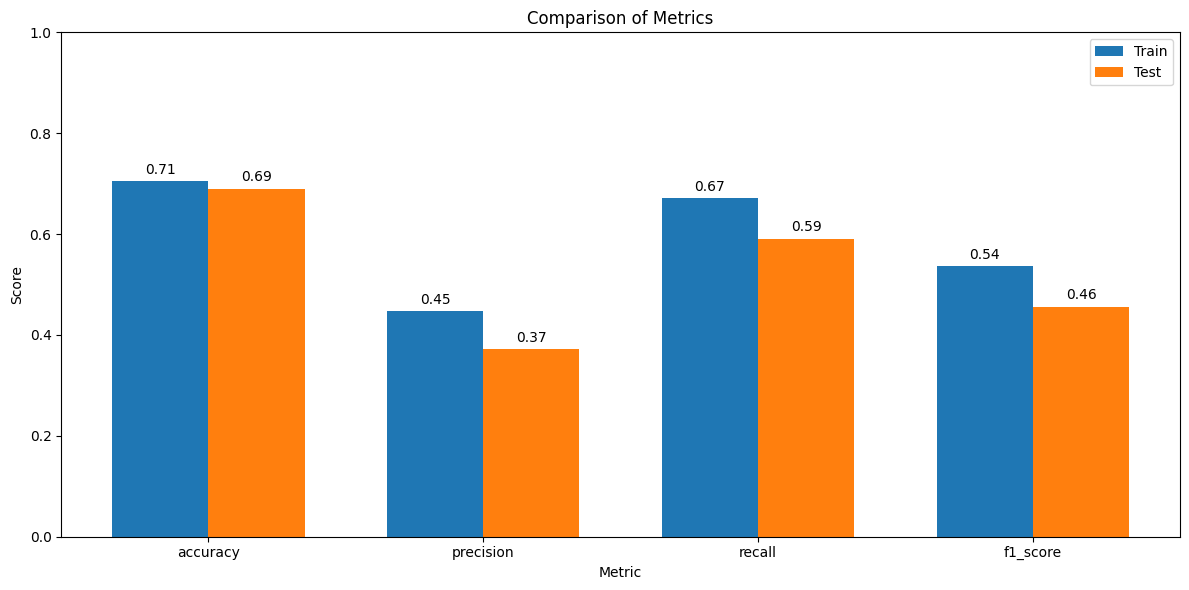

In [10]:
import numpy as np

plot_metrics = ['accuracy', 'precision', 'recall', 'f1_score']
train_scores = [metrics['train'][m] for m in plot_metrics]
test_scores = [metrics['test'][m] for m in plot_metrics]

x = np.arange(len(plot_metrics)) # label pos

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 0.35/2, train_scores, 0.35, label='Train')
rects2 = ax.bar(x + 0.35/2, test_scores, 0.35, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics')
ax.set_xticks(x)
ax.set_xticklabels(plot_metrics)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim(0, 1)
plt.show()

## Discussion

* Class Imbalance: The dataset is imbalanced, with more samples belonging to the "Not looking for job change" class (0) compared to the "Looking for a job change" class (1). This is evident from the confusion matrices, where the number of true negatives (0) is much higher than the number of true positives (1).

* Recall and Precision: The recall and precision for the positive class (1) are relatively low, indicating that the model is not performing well in identifying the minority class. This is more pronounced in the test set, where the recall is particularly low (0.136).

* Overfitting: The model's performance on the training set is better than on the test set, which might indicate some overfitting. The gap between training and test set recall suggests that the model might not generalize well to unseen data.

## Potential Improvements

- **Data Augmentation**: Generate synthetic samples to balance the dataset.
- **Model Selection**: Experiment with different algorithms such as decision trees, random forests, gradient boosting, etc.
- **Ensemble Methods**: Combine predictions from multiple models to improve overall performance.

In [11]:
# Train Logistic Regression models with and without balancing
model_balanced = LogisticRegression(class_weight='balanced')
model_unbalanced = LogisticRegression()

model_balanced.fit(X_train, y_train)
model_unbalanced.fit(X_train, y_train)

# Evaluate models on training and test sets
metrics_balanced = {
    "train": {
        "confusion_matrix": skm.confusion_matrix(y_train, model_balanced.predict(X_train)),
        "accuracy": skm.accuracy_score(y_train, model_balanced.predict(X_train)),
        "precision": skm.precision_score(y_train, model_balanced.predict(X_train)),
        "recall": skm.recall_score(y_train, model_balanced.predict(X_train)),
        "f1_score": skm.f1_score(y_train, model_balanced.predict(X_train))
    },
    "test": {
        "confusion_matrix": skm.confusion_matrix(y_test, model_balanced.predict(X_test)),
        "accuracy": skm.accuracy_score(y_test, model_balanced.predict(X_test)),
        "precision": skm.precision_score(y_test, model_balanced.predict(X_test)),
        "recall": skm.recall_score(y_test, model_balanced.predict(X_test)),
        "f1_score": skm.f1_score(y_test, model_balanced.predict(X_test))
    }
}

metrics_unbalanced = {
    "train": {
        "confusion_matrix": skm.confusion_matrix(y_train, model_unbalanced.predict(X_train)),
        "accuracy": skm.accuracy_score(y_train, model_unbalanced.predict(X_train)),
        "precision": skm.precision_score(y_train, model_unbalanced.predict(X_train)),
        "recall": skm.recall_score(y_train, model_unbalanced.predict(X_train)),
        "f1_score": skm.f1_score(y_train, model_unbalanced.predict(X_train))
    },
    "test": {
        "confusion_matrix": skm.confusion_matrix(y_test, model_unbalanced.predict(X_test)),
        "accuracy": skm.accuracy_score(y_test, model_unbalanced.predict(X_test)),
        "precision": skm.precision_score(y_test, model_unbalanced.predict(X_test)),
        "recall": skm.recall_score(y_test, model_unbalanced.predict(X_test)),
        "f1_score": skm.f1_score(y_test, model_unbalanced.predict(X_test))
    }
}

# Print and compare metrics
print("Metrics for Balanced Model:")
for set_name in ["train", "test"]:
    print(f"\n{set_name.capitalize()} Set:")
    for metric, value in metrics_balanced[set_name].items():
        print(f"{metric.capitalize()}: {value}")

print("\n\nMetrics for Unbalanced Model:")
for set_name in ["train", "test"]:
    print(f"\n{set_name.capitalize()} Set:")
    for metric, value in metrics_unbalanced[set_name].items():
        print(f"{metric.capitalize()}: {value}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Metrics for Balanced Model:

Train Set:
Confusion_matrix: [[1122  443]
 [ 176  359]]
Accuracy: 0.7052380952380952
Precision: 0.4476309226932668
Recall: 0.6710280373831776
F1_score: 0.5370231862378458

Test Set:
Confusion_matrix: [[56 22]
 [ 9 13]]
Accuracy: 0.69
Precision: 0.37142857142857144
Recall: 0.5909090909090909
F1_score: 0.456140350877193


Metrics for Unbalanced Model:

Train Set:
Confusion_matrix: [[1508   57]
 [ 447   88]]
Accuracy: 0.76
Precision: 0.6068965517241379
Recall: 0.16448598130841122
F1_score: 0.2588235294117647

Test Set:
Confusion_matrix: [[75  3]
 [21  1]]
Accuracy: 0.76
Precision: 0.25
Recall: 0.045454545454545456
F1_score: 0.07692307692307693


### Observation

1. **Accuracy**: The unbalanced model shows higher accuracy on both the train and test sets. However, accuracy alone can be misleading, especially with imbalanced datasets.
2. **Precision and Recall**: The balanced model has a better balance between precision and recall, especially on the test set. This indicates it is better at identifying true positives without being overly biased towards the majority class.
3. **F1 Score**: The balanced model has a higher F1 score on both the train and test sets, suggesting it performs better in terms of the harmonic mean of precision and recall.

### Conclusion

- **Balanced Model**: This model is more effective at handling the class imbalance, providing a better trade-off between precision and recall. It is likely more reliable for applications where both false positives and false negatives are critical.
- **Unbalanced Model**: While it shows higher accuracy, its low recall and F1 score indicate it struggles with identifying the minority class, making it less suitable for imbalanced datasets.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possibl

Metrics for LogisticRegression:
  Train Set:
    Confusion_matrix: [[1122  443]
 [ 176  359]]
    Accuracy: 0.7052380952380952
    Precision: 0.4476309226932668
    Recall: 0.6710280373831776
    F1_score: 0.5370231862378458
  Test Set:
    Confusion_matrix: [[56 22]
 [ 9 13]]
    Accuracy: 0.69
    Precision: 0.37142857142857144
    Recall: 0.5909090909090909
    F1_score: 0.456140350877193
Metrics for GradientBoostingClassifier:
  Train Set:
    Confusion_matrix: [[1463  102]
 [ 286  249]]
    Accuracy: 0.8152380952380952
    Precision: 0.7094017094017094
    Recall: 0.4654205607476635
    F1_score: 0.5620767494356659
  Test Set:
    Confusion_matrix: [[71  7]
 [16  6]]
    Accuracy: 0.77
    Precision: 0.46153846153846156
    Recall: 0.2727272727272727
    F1_score: 0.3428571428571428
Metrics for RandomForestClassifier:
  Train Set:
    Confusion_matrix: [[1565    0]
 [   2  533]]
    Accuracy: 0.9990476190476191
    Precision: 1.0
    Recall: 0.9962616822429906
    F1_score: 0.9981

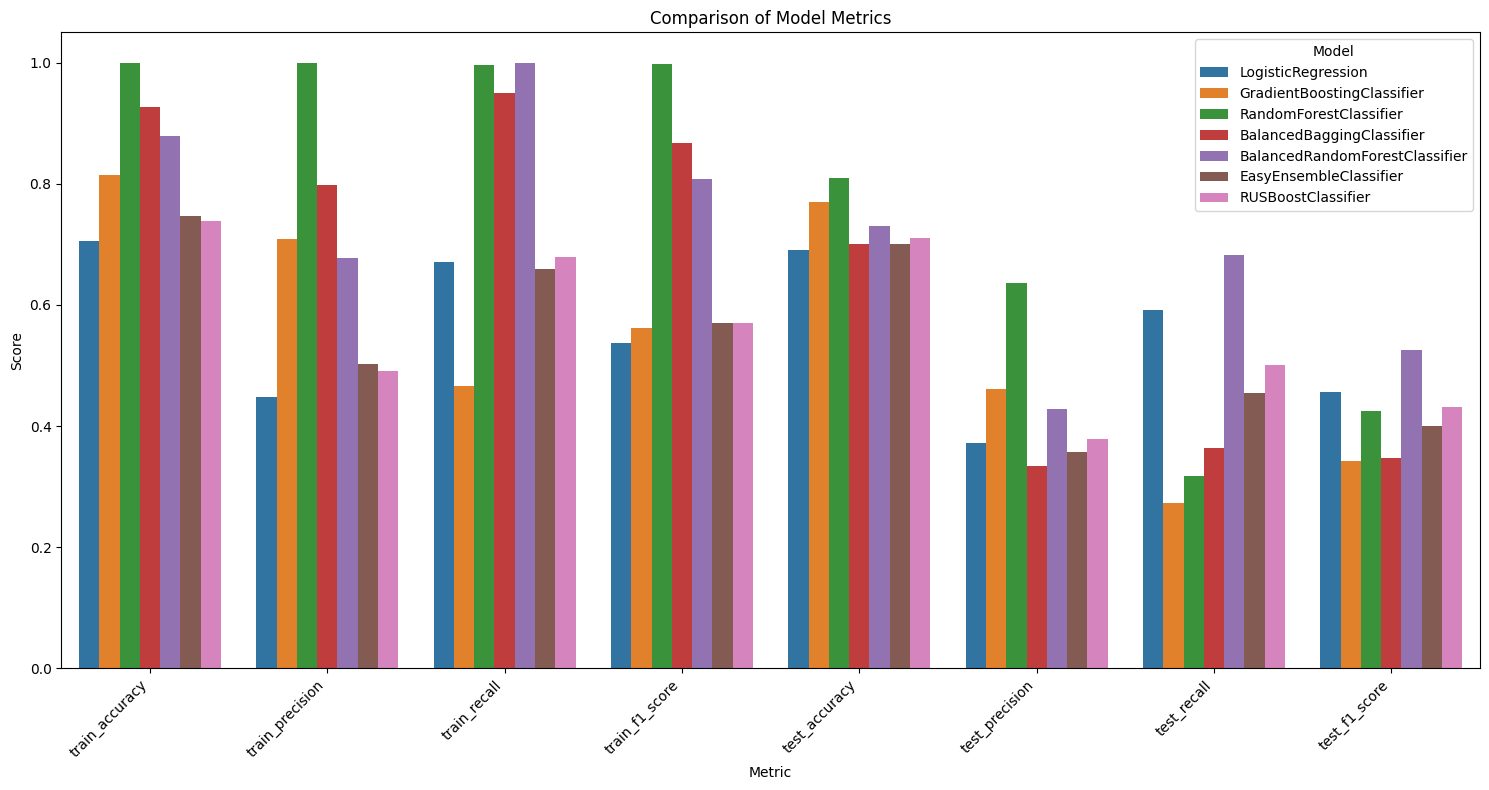

,train_accuracy,train_precision,train_recall,train_f1_score,test_accuracy,test_precision,test_recall,test_f1_score
Model,,,,,,,,
LogisticRegression,0.705238,0.447631,0.671028,0.537023,0.69,0.371429,0.590909,0.456140
GradientBoostingClassifier,0.815238,0.709402,0.465421,0.562077,0.77,0.461538,0.272727,0.342857
RandomForestClassifier,0.999048,1.000000,0.996262,0.998127,0.81,0.636364,0.318182,0.424242
BalancedBaggingClassifier,0.926190,0.798742,0.949533,0.867635,0.70,0.333333,0.363636,0.347826
BalancedRandomForestClassifier,0.879048,0.678074,1.000000,0.808157,0.73,0.428571,0.681818,0.526316
EasyEnsembleClassifier,0.747143,0.502849,0.659813,0.570736,0.70,0.357143,0.454545,0.400000
RUSBoostClassifier,0.739048,0.491204,0.678505,0.569859,0.71,0.379310,0.500000,0.431373


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import seaborn as sns

models = [
    LogisticRegression(class_weight='balanced'),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    BalancedBaggingClassifier(),
    BalancedRandomForestClassifier(),
    EasyEnsembleClassifier(),
    RUSBoostClassifier(),
]

model_metrics = {}

for model in models:
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    model_metrics[model.__class__.__name__] = {
  "train": {
    "confusion_matrix": skm.confusion_matrix(y_train, y_train_pred),
    "accuracy": skm.accuracy_score(y_train, y_train_pred),
    "precision": skm.precision_score(y_train, y_train_pred),
    "recall": skm.recall_score(y_train, y_train_pred),
    "f1_score": skm.f1_score(y_train, y_train_pred)
  },
  "test": {
    "confusion_matrix": skm.confusion_matrix(y_test, y_test_pred),
    "accuracy": skm.accuracy_score(y_test, y_test_pred),
    "precision": skm.precision_score(y_test, y_test_pred),
    "recall": skm.recall_score(y_test, y_test_pred),
    "f1_score": skm.f1_score(y_test, y_test_pred)
  },
}

for model_name, metrics in model_metrics.items():
  print(f"Metrics for {model_name}:")
  for set_name in ["train", "test"]:
    print(f"  {set_name.capitalize()} Set:")
    for metric_name, value in metrics[set_name].items():
      print(f"    {metric_name.capitalize()}: {value}")

def process_model_metrics(model_metrics):
    metrics_data = []
    confusion_matrices = {}

    for model_name, metrics in model_metrics.items():
        row = {'Model': model_name}
        confusion_matrices[model_name] = {}
        for set_name in ["train", "test"]:
            for metric_name, value in metrics[set_name].items():
                if metric_name == 'confusion_matrix':
                    confusion_matrices[model_name][set_name] = value
                else:
                    row[f"{set_name}_{metric_name}"] = value
        metrics_data.append(row)

    _metrics_df = pd.DataFrame(metrics_data)
    _metrics_df.set_index('Model', inplace=True)
    return _metrics_df, confusion_matrices

metrics_df, confusion_matrices = process_model_metrics(model_metrics)

print("\nConfusion Matrices:")
for model_name, matrices in confusion_matrices.items():
  print(f"\n{model_name}:")
  for set_name, matrix in matrices.items():
    print(f"  {set_name.capitalize()}:")
    print(matrix)

metrics_melted = metrics_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Model Metrics')
plt.tight_layout()
plt.show()

display(metrics_df)


66/66 [==============================] - 0s 1ms/step


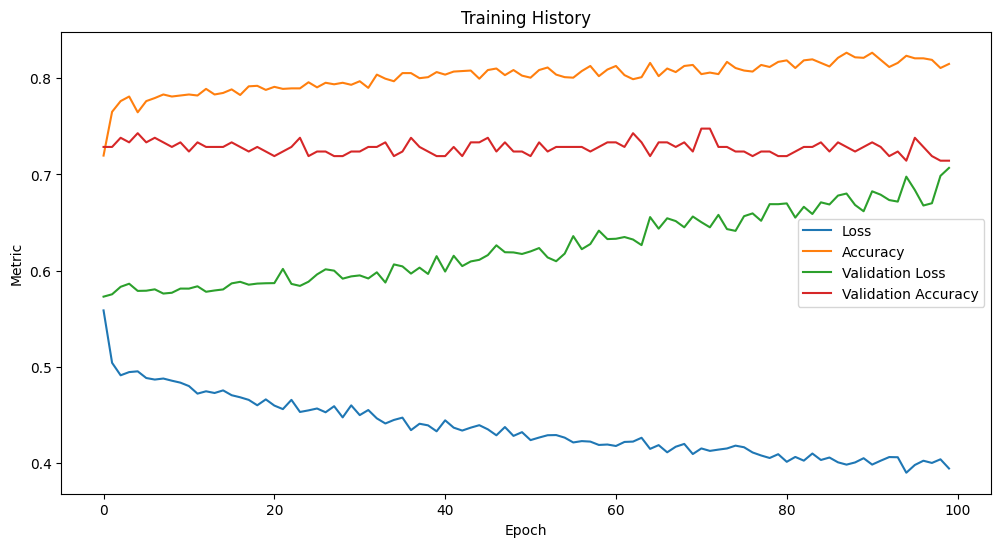

66/66 [==============================] - 0s 2ms/step


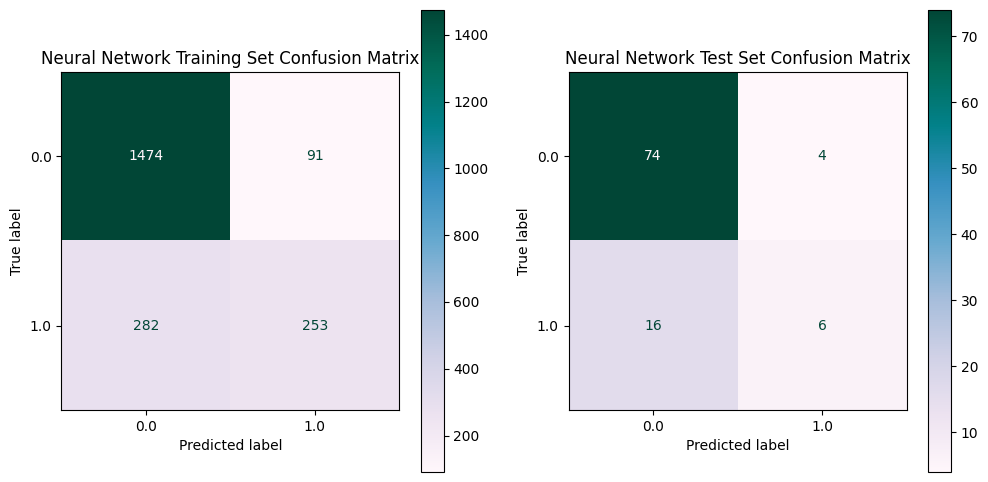

,train_accuracy,train_precision,train_recall,train_f1_score,test_accuracy,test_precision,test_recall,test_f1_score
Model,,,,,,,,
LogisticRegression,0.705238,0.447631,0.671028,0.537023,0.69,0.371429,0.590909,0.456140
GradientBoostingClassifier,0.815238,0.709402,0.465421,0.562077,0.77,0.461538,0.272727,0.342857
RandomForestClassifier,0.999048,1.000000,0.996262,0.998127,0.81,0.636364,0.318182,0.424242
BalancedBaggingClassifier,0.926190,0.798742,0.949533,0.867635,0.70,0.333333,0.363636,0.347826
BalancedRandomForestClassifier,0.879048,0.678074,1.000000,0.808157,0.73,0.428571,0.681818,0.526316
EasyEnsembleClassifier,0.747143,0.502849,0.659813,0.570736,0.70,0.357143,0.454545,0.400000
RUSBoostClassifier,0.739048,0.491204,0.678505,0.569859,0.71,0.379310,0.500000,0.431373
Neural Network,0.822381,0.735465,0.472897,0.575654,0.80,0.600000,0.272727,0.375000


In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# 0. Load training and test data
df_train = clean_and_impute(pd.read_csv(train_url))
df_test = clean_and_impute(pd.read_csv(test_url))

# 1. Extract features and target variable from both datasets
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

# 2. Auto-detect numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=['number']).columns.tolist()

# 3. Preprocess numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_features])
X_test_num = scaler.transform(X_test[numerical_features])

# 4. Preprocess categorical features
X_train_cat_list = []
X_test_cat_list = []
for feature in categorical_features:
    if feature in ['education_level','last_new_job']: encoder = OrdinalEncoder()
    else: encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_train_encoded = encoder.fit_transform(X_train[[feature]])
    X_test_encoded = encoder.transform(X_test[[feature]])
    X_train_cat_list.append(X_train_encoded)
    X_test_cat_list.append(X_test_encoded)

# 5. Concatenate features
X_train_cat = np.concatenate(X_train_cat_list, axis=1)
X_test_cat = np.concatenate(X_test_cat_list, axis=1)
X_train = np.concatenate((X_train_num, X_train_cat), axis=1)
X_test = np.concatenate((X_test_num, X_test_cat), axis=1)

# 6. Convert target variable to float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# 7. Define and compile the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

# 9. Evaluate the model
y_test_pred_nn = (model.predict(X_test) > 0.5).astype(int)
y_train_pred_nn = (model.predict(X_train) > 0.5).astype(int)

plt.figure(figsize=(12, 6))
for metric in history.history.keys():
  if 'val_' in metric:
    label = 'Validation ' + metric.replace('val_', '').capitalize()
  else: label = metric.capitalize()
  plt.plot(history.history[metric], label=label)
plt.title('Training History')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 10. Visualize the neural network performance

model_metrics["Neural Network"] = {
  "train": {
    "confusion_matrix": skm.confusion_matrix(y_train, y_train_pred_nn),
    "accuracy": skm.accuracy_score(y_train, y_train_pred_nn),
    "precision": skm.precision_score(y_train, y_train_pred_nn),
    "recall": skm.recall_score(y_train, y_train_pred_nn),
    "f1_score": skm.f1_score(y_train, y_train_pred_nn)
  },
  "test": {
    "confusion_matrix": skm.confusion_matrix(y_test, y_test_pred_nn),
    "accuracy": skm.accuracy_score(y_test, y_test_pred_nn),
    "precision": skm.precision_score(y_test, y_test_pred_nn),
    "recall": skm.recall_score(y_test, y_test_pred_nn),
    "f1_score": skm.f1_score(y_test, y_test_pred_nn)
  },
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay.from_predictions(
    y_train, (model.predict(X_train) > 0.5).astype(int),
    ax=axes[0], cmap="PuBuGn",
)
axes[0].set_title("Neural Network Training Set Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_nn, ax=axes[1], cmap="PuBuGn",
)
axes[1].set_title("Neural Network Test Set Confusion Matrix")

plt.show()

display(process_model_metrics(model_metrics)[0])